<a href="https://colab.research.google.com/github/SalvadoreFOSP/Praktikum_DataMining/blob/main/Checkpoint_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Analisis Segmentasi Pelanggan Berdasarkan Wilayah Menggunakan Model Supervised Learning**

#**Import Library**

**Core Library**

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

**Library untuk Splitting Data**

In [10]:
from sklearn.model_selection import train_test_split

**Library untuk Normalisasi Data**

In [11]:
from sklearn.preprocessing import MinMaxScaler

**Library Untuk Build Model**

In [12]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import accuracy_score

#**BUSINESS UNDERSTANDING**

##**Business Objective**

Tujuan dari dataset ini adalah untuk mengetahui wilayah negara OECD mana yang paling banyak berlangganan layanan telekomunikasi.

##**Assess Situation**

Situasi bisnis yang mendasari analisis ini adalah rendahnya optimalisasi layanan terhadap wilayah yang paling banyak pelanggannya.

##**Data Mining Goals**

Tujuan dari Data Mining pada dataset ini adalah untuk menganalisis wilayah negara OECD mana yang paling sering berlangganan layanan telekomunikasi, sehingga dapat memberikan layanan yang lebih optimal bagi setiap pelanggan.

##**Project Plan**

Rencana proyek untuk menganalisis dataset ini dimulai dengan pengumpulan data dari berbagai sumber, Selanjutnya data akan dieksplorasi untuk mengetahui wilayah mana saja yang paling banyak pelanggannya sehingga kualitas layanan bisa lebih ditingkatkan.

#**DATA UNDERSTANDING**

##**Collect Initial Data**

Sumber Dataset ini saya ambil dari Kaggle dengan judul Telecom Stats

Link Dataset = https://www.kaggle.com/datasets/willianoliveiragibin/telecom-stats/data

In [ ]:
URL = 'https://raw.githubusercontent.com/SalvadoreFOSP/Praktikum_DataMining/main/Telecom.csv'

df = pd.read_csv(URL)
df.head()

,LOCATION,Country,VAR,Variable,TIME,Time,Unit Code,Unit,PowerCode,PowerCode,Reference,Reference .1,Value
0,AUS,Australia,BB-DATA-GB,Mobile data usage per mobile broadband subscri...,2012,2012,0,0,0,Units,0,0,212.000
1,AUT,Austria,BB-DATA-GB,Mobile data usage per mobile broadband subscri...,2012,2012,0,0,0,Units,0,0,1.373
2,BEL,Belgium,BB-DATA-GB,Mobile data usage per mobile broadband subscri...,2012,2012,0,0,0,Units,0,0,115.000
3,DNK,Denmark,BB-DATA-GB,Mobile data usage per mobile broadband subscri...,2012,2012,0,0,0,Units,0,0,692.000
4,FIN,Finland,BB-DATA-GB,Mobile data usage per mobile broadband subscri...,2012,2012,0,0,0,Units,0,0,2.006


##**Describe Data**

####Informasi Dasar

In [ ]:
df

,LOCATION,Country,VAR,Variable,TIME,Time,Unit Code,Unit,PowerCode,PowerCode,Reference,Reference .1,Value
0,AUS,Australia,BB-DATA-GB,Mobile data usage per mobile broadband subscri...,2012,2012,0,0,0,Units,0,0,212.000
1,AUT,Austria,BB-DATA-GB,Mobile data usage per mobile broadband subscri...,2012,2012,0,0,0,Units,0,0,1.373
2,BEL,Belgium,BB-DATA-GB,Mobile data usage per mobile broadband subscri...,2012,2012,0,0,0,Units,0,0,115.000
3,DNK,Denmark,BB-DATA-GB,Mobile data usage per mobile broadband subscri...,2012,2012,0,0,0,Units,0,0,692.000
4,FIN,Finland,BB-DATA-GB,Mobile data usage per mobile broadband subscri...,2012,2012,0,0,0,Units,0,0,2.006
...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,LTU,Lithuania,BB-DATA-GB,Mobile data usage per mobile broadband subscri...,2022,2022,0,0,0,Units,0,0,27.757
394,SVN,Slovenia,BB-DATA-GB,Mobile data usage per mobile broadband subscri...,2022,2022,0,0,0,Units,0,0,13.399
395,OECD,OECD - Total,BB-DATA-GB,Mobile data usage per mobile broadband subscri...,2022,2022,0,0,0,Units,0,0,10.359
396,ISR,Israel,BB-DATA-GB,Mobile data usage per mobile broadband subscri...,2022,2022,0,0,0,Units,0,0,11.317


Dataset diatas terdiri dari 398 baris dan 13 kolom yang terdari dari kolom Location, Country, VAR, Variable, TIME, Time, Unit Code, Unit, PowerCode, PowerCode, Reference, Reference .1, dan Value

####Informasi Lanjutan

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LOCATION      398 non-null    object 
 1   Country       398 non-null    object 
 2   VAR           398 non-null    object 
 3   Variable      398 non-null    object 
 4   TIME          398 non-null    int64  
 5   Time          398 non-null    int64  
 6   Unit Code     398 non-null    int64  
 7   Unit          398 non-null    int64  
 8   PowerCode     398 non-null    int64  
 9   PowerCode     398 non-null    object 
 10  Reference     398 non-null    int64  
 11  Reference .1  398 non-null    int64  
 12  Value         398 non-null    float64
dtypes: float64(1), int64(7), object(5)
memory usage: 40.5+ KB


Kolom Location
- Memiliki 398 baris
- Dengan tipe data object

Kolom Country
- Memiliki 398 baris
- Dengan tipe data object

Kolom VAR
- Memiliki 398 baris
- Dengan tipe data object

Kolom Variable
- Memiliki 398 baris
- Dengan tipe data object

Kolom TIME
- Memiliki 398 baris
- Dengan tipe data integer

Kolom Time
- Memiliki 398 baris
- Dengan tipe data integer

Kolom Unit Code
- Memiliki 398 baris
- Dengan tipe data integer

Kolom Unit
- Memiliki 398 baris
- Dengan tipe data integer

Kolom PowerCode
- Memiliki 398 baris
- Dengan tipe data integer

Kolom PowerCode
- Memiliki 398 baris
- Dengan tipe data object

Kolom Reference
- Memiliki 398 baris
- Dengan tipe data integer

Kolom Reference .1
- Memiliki 398 baris
- Dengan tipe data integer

Kolom Value
- Memiliki 398 baris
- Dengan tipe data float

####Informasi Statistik Deskriptif

In [ ]:
df.describe()

,TIME,Time,Unit Code,Unit,PowerCode,Reference,Reference .1,Value
count,398.000000,398.000000,398.0,398.0,398.0,398.0,398.0,398.000000
mean,2017.314070,2017.314070,0.0,0.0,0.0,0.0,0.0,106.511563
std,3.057691,3.057691,0.0,0.0,0.0,0.0,0.0,244.570338
min,2012.000000,2012.000000,0.0,0.0,0.0,0.0,0.0,0.190000
25%,2015.000000,2015.000000,0.0,0.0,0.0,0.0,0.0,2.655250
50%,2017.000000,2017.000000,0.0,0.0,0.0,0.0,0.0,6.004000
75%,2020.000000,2020.000000,0.0,0.0,0.0,0.0,0.0,15.029000
max,2022.000000,2022.000000,0.0,0.0,0.0,0.0,0.0,976.000000


Kolom TIME
- Rata rata tahunnya yaitu tahun 2017

Kolom Time
- Tahun paling kecilnya yaitu tahun 2012

Kolom Unit Code
- Dari nilai rata-rata sampai nilai max nya bernilai 0

Kolom Unit
- Dari nilai rata-rata sampai nilai max nya bernilai 0

Kolom PowerCode
- Dari nilai rata-rata sampai nilai max nya bernilai 0

Kolom Reference
- Dari nilai rata-rata sampai nilai max nya bernilai 0

Kolom Reference .1
- Dari nilai rata-rata sampai nilai max nya bernilai 0

Kolom Value
- Rata-rata nilai valuenya yaitu 106

##**Exploratory Data Analysis**

Text(0.5, 0, 'Nilai')

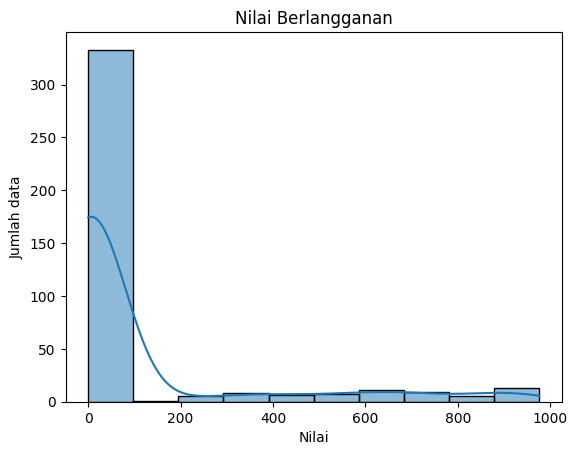

In [ ]:
sns.histplot(df['Value'].dropna(), bins=10, kde=True)
plt.title('Nilai Berlangganan')
plt.ylabel('Jumlah data')
plt.xlabel('Nilai')

Dapat dilihat bahwa nilai yang berlangganan berdistribusi tidak normal

##**Verify Data Quality**

####Missing Values

In [ ]:
df.isna().sum()

LOCATION        0
Country         0
VAR             0
Variable        0
TIME            0
Time            0
Unit Code       0
Unit            0
PowerCode       0
PowerCode       0
Reference       0
Reference .1    0
Value           0
dtype: int64

Dari informasi diatas dapat dilihat bahwa semua kolom tidak ada yang memiliki nilai kosong

####Outliers Values

<Axes: >

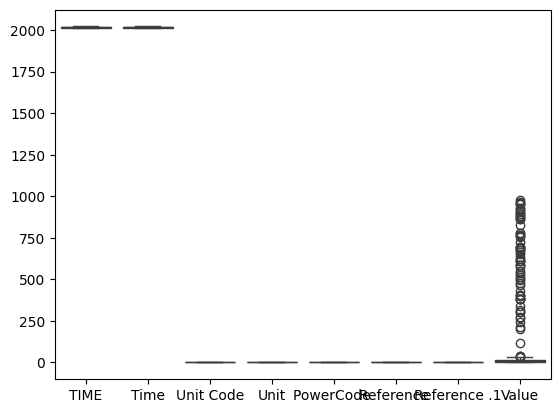

In [ ]:
sns.boxplot(data=df)

Dapat dilihat dari visualisasi diatas bahwa terdapat nilai anomali pada kolom TIME dan kolom Time

####Duplicated Values

In [ ]:
df.duplicated().sum()

0

Dari informasi diatas dapat dilihat bahwa tidak ada nilai yang duplikat

#**DATA PREPARATION**

##**Data Cleaning**

###**Penanganan Missing values**

####**Pengecekan Missing Values**

In [ ]:
print((df.isna().sum() / len(df)) * 100)

LOCATION        0.0
Country         0.0
VAR             0.0
Variable        0.0
TIME            0.0
Time            0.0
Unit Code       0.0
Unit            0.0
PowerCode       0.0
PowerCode       0.0
Reference       0.0
Reference .1    0.0
Value           0.0
dtype: float64


Bisa dilihat dari informasi diatas bahwa pada dataset ini tidak terdapat missing values

###**Penanganan Duplicated Values**

####**Pengecekkan Nilai Duplikat**







In [ ]:
df[df.duplicated()]

,LOCATION,Country,VAR,Variable,TIME,Time,Unit Code,Unit,PowerCode,PowerCode,Reference,Reference .1,Value


####**Hapus Nilai Duplikat**

In [ ]:
df = df.drop_duplicates()

###**Penanganan Outliers**

####**Pengecekan Outliers**

In [ ]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
TIME,0.000000
Time,0.000000
Unit Code,0.000000
Unit,0.000000
PowerCode,0.000000
Reference,0.000000
Reference .1,0.000000
Value,17.336683


Dapat dilihat dari data diatas karena persentase Outliersnya >= 10% maka akan kita abaikan saja

##**Construct Data**

###**Melakukan Rekayasa Fitur (Feature Engineering)**

In [ ]:
def categorize_time(time):
    if time < 2020:
        return 'Old'
    else:
        return 'New'

df['TimeCategory'] = df['Time'].apply(categorize_time)

###**Pengecekkan Hasil**

In [ ]:
df

,LOCATION,Country,VAR,Variable,TIME,Time,Unit Code,Unit,PowerCode,PowerCode,Reference,Reference .1,Value,TimeCategory
0,AUS,Australia,BB-DATA-GB,Mobile data usage per mobile broadband subscri...,2012,2012,0,0,0,Units,0,0,212.000,Old
1,AUT,Austria,BB-DATA-GB,Mobile data usage per mobile broadband subscri...,2012,2012,0,0,0,Units,0,0,1.373,Old
2,BEL,Belgium,BB-DATA-GB,Mobile data usage per mobile broadband subscri...,2012,2012,0,0,0,Units,0,0,115.000,Old
3,DNK,Denmark,BB-DATA-GB,Mobile data usage per mobile broadband subscri...,2012,2012,0,0,0,Units,0,0,692.000,Old
4,FIN,Finland,BB-DATA-GB,Mobile data usage per mobile broadband subscri...,2012,2012,0,0,0,Units,0,0,2.006,Old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,LTU,Lithuania,BB-DATA-GB,Mobile data usage per mobile broadband subscri...,2022,2022,0,0,0,Units,0,0,27.757,New
394,SVN,Slovenia,BB-DATA-GB,Mobile data usage per mobile broadband subscri...,2022,2022,0,0,0,Units,0,0,13.399,New
395,OECD,OECD - Total,BB-DATA-GB,Mobile data usage per mobile broadband subscri...,2022,2022,0,0,0,Units,0,0,10.359,New
396,ISR,Israel,BB-DATA-GB,Mobile data usage per mobile broadband subscri...,2022,2022,0,0,0,Units,0,0,11.317,New


Disini kita mengkategorikan tahun 2012-2019 sebagai Old dan tahun 2020-2022 sebagai new



##**Data Reduction**

###**Mengurangi Fitur - Fitur Yang Kurang Relevan**

In [ ]:
df = df.drop(['LOCATION', 'VAR', 'TIME', 'Unit Code', 'Unit', 'PowerCode', 'Reference .1'], axis=1)
df = df.drop(['Variable _Mobile data usage per mobile broadband subscription, GB per month'], axis=1)

###**Pengecekkan Hasil**

In [ ]:
df.head()

Disini kita menghapus beberapa kolom yang kurang relevan untuk analisis kita

##**Data Transformation**

###**Mapping**

In [ ]:
df['TimeCategory'] = df['TimeCategory'].map({'Old': 0, 'New': 1}).astype(int)

Disini kita melakukan mapping terhadap kolom TimeCategory agar menjadi kolom numerikal dengan nilai 0 untuk Old dan 1 untuk New

###**Encoding**

In [ ]:
df = pd.get_dummies(df)

###**Pengecekkan Hasil**

In [ ]:
df

Disini adalah data yang sudah melalui tahap Data Preparation

#**MODELLING**

##**Select Modelling Techniques**

Disini saya memilih Model Asosiatif untuk dataset saya karena saya ingin mengklasterisasi wilayah wilayah berdasarkan tahun

##**Modelling Associate**

###**Data Cleaned**

In [22]:
URL = 'https://raw.githubusercontent.com/SalvadoreFOSP/Praktikum_DataMining/main/DataCleaned.csv'

df = pd.read_csv(URL)
df.head()

,Time,PowerCode,Reference,Value,TimeCategory,Country_Australia,Country_Austria,Country_Belgium,Country_Canada,Country_Chile,...,Country_Poland,Country_Portugal,Country_Slovak Republic,Country_Slovenia,Country_Spain,Country_Sweden,Country_Switzerland,Country_Türkiye,Country_United Kingdom,Country_United States
0,2012,0,0,212.000,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2012,0,0,1.373,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2012,0,0,115.000,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2012,0,0,692.000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2012,0,0,2.006,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


###**Pre-Processing**

####**Adjusment**

In [23]:
x_final = df.drop("Time", axis=1)

####**Normalisasi Data**

In [24]:
scaler = MinMaxScaler()

x_final_norm = scaler.fit_transform(x_final)

####**Validasi Silang**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

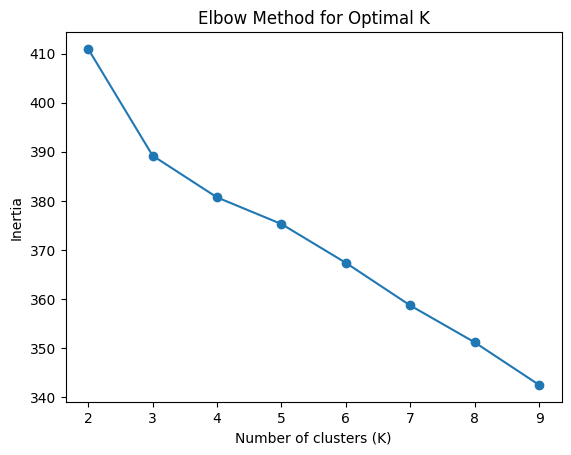

In [25]:
inertia_values = []

k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_final_norm)
    inertia_values.append(kmeans.inertia_)

plt.plot(k_range, inertia_values, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.xticks(k_range)
plt.show()

###**Build Model**

#####**K-Means**

In [26]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(x_final_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

#####**Hierarchical Clustering**

In [27]:
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')

###**Begins and Compare Clusters**

In [28]:
kmeans_clust = kmeans.predict(x_final_norm)
hierarchy_clust = hc.fit_predict(x_final_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [29]:
x_final = pd.DataFrame(x_final).reset_index(drop=True)

kmeans_col = pd.DataFrame(kmeans_clust, columns=["kmeans_cluster"])
hierarchy_col = pd.DataFrame(hierarchy_clust, columns=["hierarchy_cluster"])

combined_data_assoc = pd.concat([x_final, kmeans_col, hierarchy_col], axis=1)

In [30]:
combined_data_assoc.head()

,PowerCode,Reference,Value,TimeCategory,Country_Australia,Country_Austria,Country_Belgium,Country_Canada,Country_Chile,Country_Colombia,...,Country_Slovak Republic,Country_Slovenia,Country_Spain,Country_Sweden,Country_Switzerland,Country_Türkiye,Country_United Kingdom,Country_United States,kmeans_cluster,hierarchy_cluster
0,0,0,212.000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,1.373,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,0,0,115.000,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,692.000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,1
4,0,0,2.006,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


#**EVALUATION**

##**Evaluate Results**

###**Klustering**

In [31]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

silhouette_avg_kmeans = silhouette_score(x_final_norm, kmeans.labels_)
ch_score_kmeans = calinski_harabasz_score(x_final_norm, kmeans.labels_)
db_score_kmeans = davies_bouldin_score(x_final_norm, kmeans.labels_)

silhouette_avg_hc = silhouette_score(x_final_norm, hierarchy_clust)
ch_score_hc = calinski_harabasz_score(x_final_norm, hierarchy_clust)
db_score_hc = davies_bouldin_score(x_final_norm, hierarchy_clust)

metrics = ["Silhouette Score", "Calinski-Harabasz Score", "Davies-Bouldin Score"]
scores_kmeans = [silhouette_avg_kmeans, ch_score_kmeans, db_score_kmeans]
scores_hc = [silhouette_avg_hc, ch_score_hc, db_score_hc]

df_scores = pd.DataFrame({'': metrics,
                          'KMeans Score': scores_kmeans,
                          'Agglomerative Clustering Score': scores_hc})

df_scores = df_scores.set_index('')

df_scores = df_scores.T

display(df_scores)

,Silhouette Score,Calinski-Harabasz Score,Davies-Bouldin Score
KMeans Score,0.125257,39.483905,2.252899
Agglomerative Clustering Score,0.049646,9.788781,3.499318


Silhouette : Mendekati 1, maka data yang digunakan sangat cocok dengan kluster yang terbagi. Kalau 0, maka data mendekati batas luar kedua kluster. Kalau mendekati -1 berarti data salah ditempatkan pada kluster yang seharusnya (penempatan kluster salah)

Calinski-Harabasz Score : Semakin tinggi, maka kluster terpisah semakin baik

Davies-Bouldin : Semakin kecil, maka semakin baik kluster terpisah

##**Review Process**

###**Cross Validation**

In [32]:
from sklearn.model_selection import TimeSeriesSplit
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4, 5, 6])
time_series = TimeSeriesSplit()
print(time_series)
for train_index, test_index in time_series.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
TRAIN: [0] TEST: [1]
TRAIN: [0 1] TEST: [2]
TRAIN: [0 1 2] TEST: [3]
TRAIN: [0 1 2 3] TEST: [4]
TRAIN: [0 1 2 3 4] TEST: [5]


###**Feature Selection**

Jumlah komponen utama: 2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


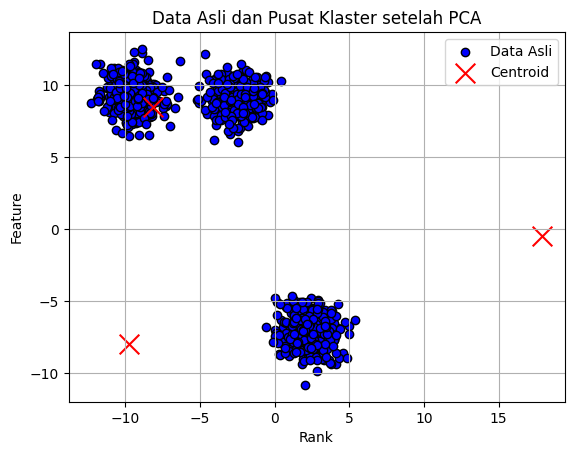

In [35]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs

# Membuat data contoh
X, _ = make_blobs(n_samples=1000, centers=3, n_features=10, random_state=42)

# Inisialisasi model PCA dengan menjaga 95% varians
pca = PCA(n_components=0.95)

# Mengurangi dimensi fitur menggunakan PCA
X_pca = pca.fit_transform(X)

# Menampilkan jumlah komponen utama yang dipilih
print("Jumlah komponen utama:", pca.n_components_)

# Inisialisasi model KMeans
kmeans = KMeans(n_clusters=3)

# Melatih model KMeans dengan fitur yang telah direduksi
kmeans.fit(X_pca)

# Visualisasi data asli dengan dua fitur pertama
plt.scatter(X[:, 0], X[:, 1], c='blue', marker='o', edgecolor='k', label='Data Asli')

# Visualisasi pusat klaster setelah PCA
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, label='Centroid')

plt.title('Data Asli dan Pusat Klaster setelah PCA')
plt.xlabel('Rank')
plt.ylabel('Feature')
plt.legend()
plt.grid(True)
plt.show()


###**Tuning Hyperparameter**

In [36]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.model_selection import GridSearchCV

# Membuat data contoh
X, _ = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=42)

# Definisikan parameter grid untuk pencarian hyperparameter terbaik
param_grid = {'n_clusters': [2, 3, 4, 5, 6],
              'init': ['k-means++', 'random'],
              'max_iter': [100, 200, 300, 400, 500]}

# Membuat objek KMeans
kmeans = KMeans()

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(kmeans, param_grid, cv=5)

# Melakukan pencarian hyperparameter terbaik
grid_search.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

GridSearchCV(cv=5, estimator=KMeans(),
             param_grid={'init': ['k-means++', 'random'],
                         'max_iter': [100, 200, 300, 400, 500],
                         'n_clusters': [2, 3, 4, 5, 6]})

In [ ]:
print("Parameter terbaik:", grid_search.best_params_)

Parameter terbaik: {'init': 'k-means++', 'max_iter': 500, 'n_clusters': 6}
